In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
output_files = [f'result_duckpop_{duckpop}_chickenvacc_0.h5' for duckpop in range(0, 3001, 200)]

print(output_files[3])

result_duckpop_600_chickenvacc_0.h5


In [4]:
def read_output(output_file):
    # Initialize a dictionary to store the results
    simulation_data = {}

    # Open the HDF5 file
    with h5py.File(output_file, 'r') as f:
        # Extract global parameters
        if "parameters" in f:
            global_parameters = {key: f["parameters"][key][:] if key in f["parameters"] 
                                else f["parameters"].attrs[key]
                                for key in f["parameters"]}
            simulation_data["parameters"] = global_parameters

        # Iterate over all other groups (simulations)
        for sim_name in f:
            if sim_name == "parameters":
                continue  # Skip the parameters group
            
            # Access the simulation group
            sim_group = f[sim_name]
            
            # Check for time and state datasets
            if "time" in sim_group and "state" in sim_group:
                t = sim_group["time"][:]
                y = sim_group["state"][:]
                simulation_data[sim_name] = {
                    "time": t,
                    "state": y
                }
            else:
                print(f"Warning: Missing 'time' or 'state' in {sim_name}")

    return simulation_data

In [5]:
def print_parameters(simulation_data):
    if "parameters" in simulation_data:
        print("Global Parameters:")
        
        param_group = simulation_data["parameters"]
        
        # Print the datasets (arrays)
        for key, value in param_group.items():
            print(f"{key}: {value.tolist()}")  # Convert numpy array to list for better readability
        
        # Print the attributes (non-array parameters)
        if isinstance(param_group, h5py.Group):
            for key, value in param_group.attrs.items():
                print(f"{key}: {value}")
        else:
            print("No attributes found in parameters.")
    else:
        print("No parameters found in the simulation data.")

In [6]:
print_parameters(read_output(output_files[0]))

Global Parameters:
chicken_asymptomatic_infectious_period: [15]
chicken_asymptomatic_latency_period: [1]
chicken_symptomatic_infectious_period: [1.4]
chicken_symptomatic_latency_period: [1]
chicken_symptomatic_prob: [0.95]
different_species_asymptomatic_infection_rate: [0.25]
different_species_symptomatic_infection_rate: [0.3]
duck_asymptomatic_infectious_period: [15]
duck_asymptomatic_latency_period: [1]
duck_symptomatic_infectious_period: [1.4]
duck_symptomatic_latency_period: [1]
duck_symptomatic_prob: [0.05]
farm_area: [5000]
num_flocks: [1]
num_simu: [1000]
num_species: [4]
same_species_asymptomatic_infection_rate: [1.07]
same_species_symptomatic_infection_rate: [1.13]
surveillance: [30]
testing_period: [7]
tot_chicken_popul: [5000]
tot_duck_popul: [0]
vaccinated: [0]
No attributes found in parameters.


In [55]:
lst = [0,5,10,15]
simulation_data = [read_output(output_files[i]) for i in lst]

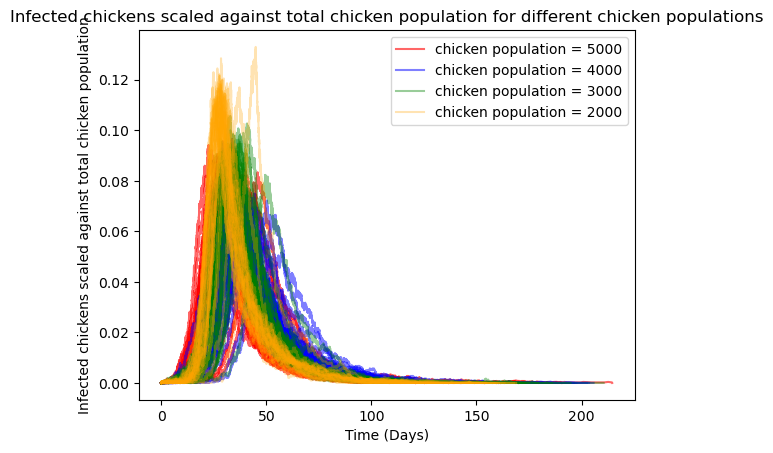

In [57]:
col = ['red', 'blue', 'green', 'orange', 'purple']
chickenpop = [5000,4000,3000,2000]
alpha = [0.6, 0.5, 0.4, 0.3, 0.1]
for i in range(len(simulation_data)):
    for j in range(1, 101):
        t = simulation_data[i][f"simulation_{j}"]["time"]
        y = simulation_data[i][f"simulation_{j}"]["state"]
        if j == 1:
            plt.plot(t, (np.sum(y[:, 0, 0:2, 3], axis=1) + np.sum(y[:, 0, 0:2, 4], axis=1))/chickenpop[i], color=col[i], alpha=alpha[i], label=f'chicken population = {chickenpop[i]}')
        else:
            plt.plot(t, (np.sum(y[:, 0, 0:2, 3], axis=1) + np.sum(y[:, 0, 0:2, 4], axis=1))/chickenpop[i], color=col[i], alpha=alpha[i])
plt.xlabel('Time (Days)')
plt.ylabel('Infected chickens scaled against total chicken population')
plt.legend()
plt.title('Infected chickens scaled against total chicken population for different chicken populations')
plt.show()


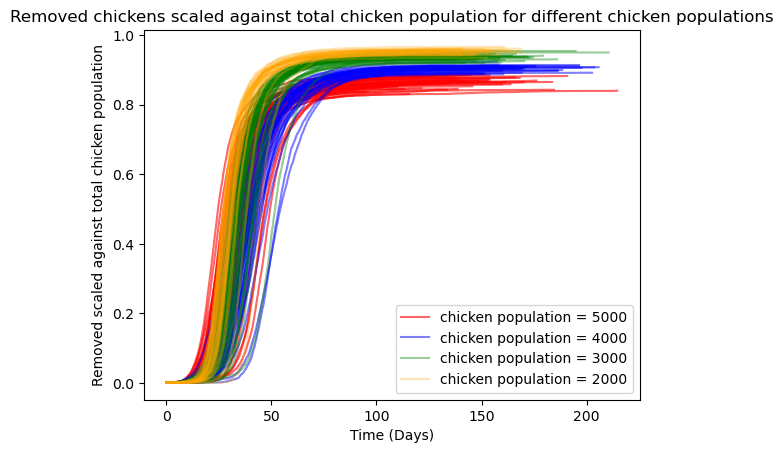

In [58]:
for i in range(len(simulation_data)):
    for j in range(1, 101):
        t = simulation_data[i][f"simulation_{j}"]["time"]
        y = simulation_data[i][f"simulation_{j}"]["state"]
        if j == 1:
            plt.plot(t, (np.sum(y[:, 0, 0:2, 5], axis=1))/chickenpop[i], color=col[i], alpha=alpha[i], label=f'chicken population = {chickenpop[i]}')
        else:
            plt.plot(t, (np.sum(y[:, 0, 0:2, 5], axis=1))/chickenpop[i], color=col[i], alpha=alpha[i])
plt.xlabel('Time (Days)')
plt.ylabel('Removed scaled against total chicken population')
plt.legend()
plt.title('Removed chickens scaled against total chicken population for different chicken populations')
plt.show()






In [95]:
def outbreak_prob(simulation_data, outbreak_threshold = 5):
    outbreak_count = 0
    for i in range(1, 1001):
        sim_name = f"simulation_{i}"
        y = simulation_data[sim_name]["state"]
        if np.sum(y[-1, 0, 0:2, 5]) >= outbreak_threshold:
            outbreak_count += 1
    return outbreak_count / 1000

duck_pop_lst = [0, 1500, 3000, 5000]
chicken_vacc_lst = [0, 1500, 2250, 2700]
for j in range(4):
    for i in range(4):
        print(f'Outbreak probability with duck population = {duck_pop_lst[i]} and chicken vaccination = {chicken_vacc_lst[j]}: {outbreak_prob(read_output(output_files[i][j]))}')


Outbreak probability with duck population = 0 and chicken vaccination = 0: 0.246
Outbreak probability with duck population = 1500 and chicken vaccination = 0: 0.339
Outbreak probability with duck population = 3000 and chicken vaccination = 0: 0.422
Outbreak probability with duck population = 5000 and chicken vaccination = 0: 0.463
Outbreak probability with duck population = 0 and chicken vaccination = 1500: 0.084
Outbreak probability with duck population = 1500 and chicken vaccination = 1500: 0.166
Outbreak probability with duck population = 3000 and chicken vaccination = 1500: 0.247
Outbreak probability with duck population = 5000 and chicken vaccination = 1500: 0.389
Outbreak probability with duck population = 0 and chicken vaccination = 2250: 0.015
Outbreak probability with duck population = 1500 and chicken vaccination = 2250: 0.142
Outbreak probability with duck population = 3000 and chicken vaccination = 2250: 0.204
Outbreak probability with duck population = 5000 and chicken vac

In [96]:


# for j in range(4):
#     simulation_data1 = read_output(output_files[0][j])
#     simulation_data2 = read_output(output_files[1][j])
#     simulation_data3 = read_output(output_files[2][j])
#     simulation_data4 = read_output(output_files[3][j])
#     for i in range(1, 1001):
#         sim_name = f"simulation_{i}"
#         t1 = simulation_data1[sim_name]["time"]
#         y1 = simulation_data1[sim_name]["state"]
#         t2 = simulation_data2[sim_name]["time"]
#         y2 = simulation_data2[sim_name]["state"]
#         t3 = simulation_data3[sim_name]["time"]
#         y3 = simulation_data3[sim_name]["state"]
#         t4 = simulation_data4[sim_name]["time"]
#         y4 = simulation_data4[sim_name]["state"]
#         if i == 1:
#             plt.plot(t1, y1[:, 0, 1, 3] + y1[:, 0, 1, 4], color='blue', alpha=0.5, label='duck population = 0')
#             plt.plot(t2, y2[:, 0, 1, 3] + y2[:, 0, 1, 4], color='orange', alpha=0.3, label='duck population = 1500')
#             plt.plot(t3, y3[:, 0, 1, 3] + y3[:, 0, 1, 4], color='green', alpha=0.2, label='duck population = 3000')
#             plt.plot(t4, y4[:, 0, 1, 3] + y4[:, 0, 1, 4], color='red', alpha=0.1, label='duck population = 5000')
#         else:
#             plt.plot(t1, y1[:, 0, 1, 3] + y1[:, 0, 1, 4], color='blue', alpha=0.5)
#             plt.plot(t2, y2[:, 0, 1, 3] + y2[:, 0, 1, 4], color='orange', alpha=0.3)
#             plt.plot(t3, y3[:, 0, 1, 3] + y3[:, 0, 1, 4], color='green', alpha=0.2)
#             plt.plot(t4, y4[:, 0, 1, 3] + y4[:, 0, 1, 4], color='red', alpha=0.1)
#     plt.title('Time series of the number of infected sentinels')
#     plt.xlabel('Time (days)')
#     plt.ylabel('Number of infected chickens')
#     plt.legend()
#     plt.show()
